# Exact Diagonalization of 2D J-Q Hamiltonian
    Himadri Halder, S. Pujari Group
    2024, IIT Bombay

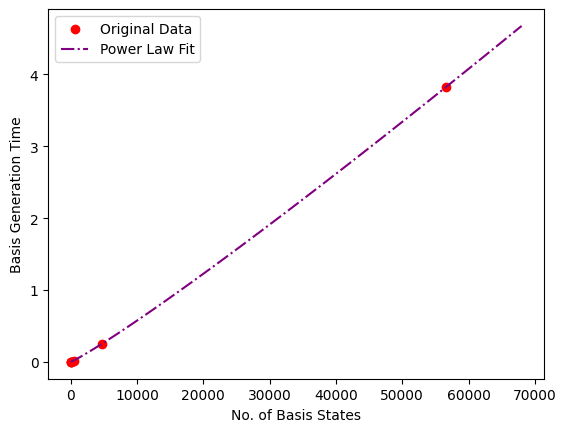

Extrapolated values:
Power law fit: x = 60000, y = 4.076609864540439 s, x = 126056625, y = 17500.797028189216 s


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Data points
x = np.array([3, 10, 44, 441, 4654, 56664])
y = np.array([0.000064, 0.000116, 0.000943, 0.015189, 0.249599, 3.829415])

# Polynomial fit (degree 4 as previously determined to be optimal)
degree = 4
poly_coefficients = np.polyfit(x, y, degree)
poly_fit = np.poly1d(poly_coefficients)
y_poly_fit = poly_fit(x)

# Exponential fit function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Power law fit function
def power_func(x, a, b):
    return a * x**b

# Attempt exponential fit and handle potential errors
try:
    exp_params, _ = curve_fit(exponential_func, x, y, p0=(1, 0.0001))
    y_exp_fit = exponential_func(x, *exp_params)
    exp_fit_func = lambda x: exponential_func(x, *exp_params)
except RuntimeError:
    print("Exponential fit could not converge.")
    exp_params, y_exp_fit, exp_fit_func = None, None, None

# Attempt power law fit and handle potential errors
try:
    power_params, _ = curve_fit(power_func, x, y)
    y_power_fit = power_func(x, *power_params)
    power_fit_func = lambda x: power_func(x, *power_params)
except RuntimeError:
    print("Power law fit could not converge.")
    power_params, y_power_fit, power_fit_func = None, None, None

# Plot all models for comparison
x_fit = np.linspace(min(x), max(x) * 1.2, 100)
plt.scatter(x, y, color='red', label='Original Data')
# plt.plot(x_fit, poly_fit(x_fit), label='4th Degree Polynomial Fit', color='blue', linestyle='--')

# Exponential fit plot if successful
# if exp_params is not None:
#     plt.plot(x_fit, exp_fit_func(x_fit), label='Exponential Fit', color='green', linestyle=':')

# Power law fit plot if successful
if power_params is not None:
    plt.plot(x_fit, power_fit_func(x_fit), label='Power Law Fit', color='purple', linestyle='-.')

# Customize plot
plt.xlabel('No. of Basis States')
plt.ylabel('Basis Generation Time')
# plt.yscale('log')  # Log scale for better visualization of differences
plt.legend()
# plt.title('Comparing Polynomial, Exponential, and Power Law Fits')
plt.show()

# Extrapolation values for x = 60000 and x = 70000
x_extrap = np.array([60000, 126056625]) # No. of Basis states
y_poly_extrap = poly_fit(x_extrap)
# y_exp_extrap = exp_fit_func(x_extrap) if exp_params is not None else None
y_power_extrap = power_fit_func(x_extrap) if power_params is not None else None

print("Extrapolated values:")
# print(f"Polynomial fit: x = 60000, y = {y_poly_extrap[0]}, x = 70000, y = {y_poly_extrap[1]}")
# if y_exp_extrap is not None:
#     print(f"Exponential fit: x = 60000, y = {y_exp_extrap[0]}, x = 70000, y = {y_exp_extrap[1]}")
if y_power_extrap is not None:
    print(f"Power law fit: x = {x_extrap[0]}, y = {y_power_extrap[0]} s, x = {x_extrap[1]}, y = {y_power_extrap[1]} s")

Fitted parameters: A = 9.148692856145867e-06, p = 1.4021043935982065
Extrapolated b for a = 126056625: 2085440.346446326 s


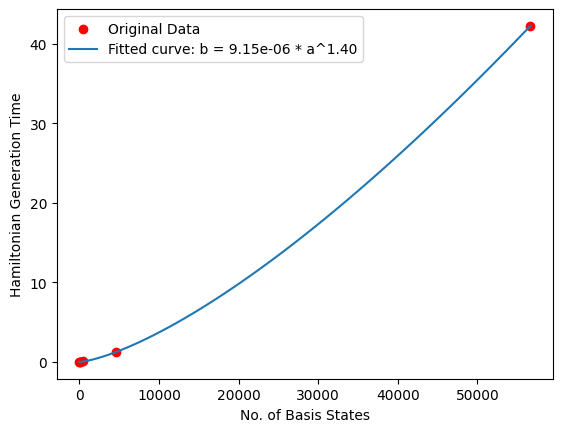

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given data
a = np.array([3, 10, 44, 441, 4654, 56664])
b = np.array([0.000067, 0.000263, 0.002755, 0.122891, 1.265232, 42.266162])

# Define the power-law model
def power_law(x, A, p):
    return A * x ** p

# Perform the curve fitting
params, covariance = curve_fit(power_law, a, b)

# Extract fitted parameters
A, p = params
print(f"Fitted parameters: A = {A}, p = {p}")

# Extrapolate for a new value of a
new_a = 126056625  # No. of basis states
extrapolated_b = power_law(new_a, *params)
print(f"Extrapolated b for a = {new_a}: {extrapolated_b} s")

# Plot the data and the fitted curve
plt.scatter(a, b, color='red', label='Original Data')
a_fit = np.linspace(min(a), max(a), 100)
b_fit = power_law(a_fit, *params)
plt.plot(a_fit, b_fit, label=f'Fitted curve: b = {A:.2e} * a^{p:.2f}')
plt.xlabel('No. of Basis States')
plt.ylabel('Hamiltonian Generation Time')
plt.legend()
plt.show()